In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import toytree as ttplt
import bte

The BTE package allows comprehensive analysis of the entire SARS-CoV-2 phylogenetic tree, including millions of samples of data!

The power of the Mutation Annotated Tree is that it is a compact representation of an incredible amount of data in a single object. While many analyses are technically possible with extremely large VCFs, or just a Newick, or just a metadata table with clade annotations, only the combined MAT allows any and all of these analyses on a single integrated dataset.

First, we must load the tree from a protocol buffer storage into our MATree class object. The loading process is multithreaded.

In [3]:
mat = bte.MATree("public-2022-04-08.all.masked.nextclade.pangolin.pb.gz")

Finished 'from_pb' in 24.4196 seconds


BTE includes numerous functions for tree summarization, including total parsimony and counts of mutations sorted by type of mutation.

In [4]:
ps = mat.get_parsimony_score()
samples = mat.get_leaves_ids()
samplecount = len(samples)
samplecount, ps

Finished 'get_leaves_ids' in 2.0481 seconds


(4727267, 3813200)

/Users/jmcbr/opt/anaconda3/envs/btebind/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Type')

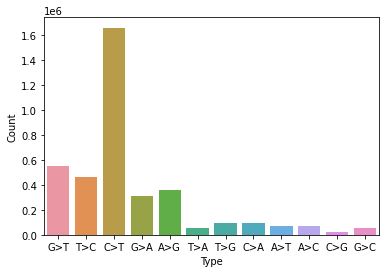

In [5]:
mcount = mat.count_mutations()
ax = sns.barplot(list(mcount.keys()),list(mcount.values()))
ax.set_ylabel("Count")
ax.set_xlabel("Type")

The MAT object can contain clade and lineage annotations, which can be easily extracted by BTE.

In [9]:
omicron = mat.get_clade("BA.1.1")

Getting clade: BA.1.1
Successfully found 383407 samples.


Large sample input; building subtree by pruning all but 383407 samples.
Completed in 20028 msec 



AttributeError: 'bte.MATree' object has no attribute 'get_samples_ids'

In [10]:
len(omicron.get_leaves_ids())

Finished 'get_leaves_ids' in 0.2412 seconds


383407

BTE includes additional useful functions for computing phylogenetic statistics.

In [12]:
nd = omicron.compute_nucleotide_diversity()
nd

AssertionError: 

BTE can select subtrees by whether they contain samples which match arbitrary regex patterns. As SARS-CoV-2 samples generally are uploaded with a standardized name pattern, we can use this to extract samples collected on a specific day or from a particular area.

In [51]:
#samples collected in California on March 17th, 2022.
selection = mat.get_regex_samples("USA/CA.*2022-03-17")
len(selection)

111

There are a number of tree visualization packages available across different platforms. For visualization of thousands to millions of samples, we recommend creating a Taxonium protocol buffer using the matUtils command line toolkit. 

In [54]:
test = mat.subtree([s.decode("UTF-8") for s in selection])
canvas,axes,makr = ttplt.tree(test.write_newick(),tree_format=1).draw(tip_labels_align=True,height=1200,width=500)
axes.show = True
axes.x.ticks.show = True

Extracting subtree of 111 samples.


Finished 'subtree' in 0.3234 seconds


Completed in 323 msec 



<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="1200.0px" viewBox="0 0 500.0 1200.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t1b27837882f34540bff235fc8645d90c"> USA/CA-CDC-QDX35038468/2022|ON139881.1|2022-03-17 USA/CA-CDC-ASC210736426/2022|ON106654.1|2022-03-17 USA/CA-CDC-ASC210736318/2022|ON115924.1|2022-03-17 USA/CA-CDC-ASC210845577/2022|ON106585.1|2022-03-17 USA/CA-CDC-QDX35038459/2022|ON139787.1|2022-03-17 USA/CA-CDC-STM-7PQ76Q9ZT/2022|ON143210.1|2022-03-17 USA/CA-CDC-STM-V7369CK9P/2022|ON143161.1|2022-03-17 USA/CA-CDC-ASC210846217/2022|ON144810.1|2022-03-17 USA/CA-CDC-ASC210845751/2022|ON140993.1|2022-03-17 USA/CA-CDC-LC0565771/2022|ON092019.1|2022-03-17 USA/CA-CDC-ASC210845553/2022|ON106603.1|2022-03-17 USA/CA-CDC-QDX35038470/2022|ON139803.1|2022-03-17 USA/CA-CDC-QDX35038473/2022|ON139850.1|2022-03-17 USA/CA-CDC-ASC210736477/2022|ON106567.1|2022-03-17 USA/CA-CDC-LC0565728/2022|ON091986.1|2022-03-17 USA/CA-CDC-QDX35038471/2022|ON139834.1|2022-03-17 USA/CA-CDC-QDX35038482/2022|ON139830.1|2022-03-17 USA/CA-CDC-QDX35038480/2022|ON139812.1|2022-03-17 USA/CA-CDC-QDX35038464/2022|ON139781.1|2022-03-17 USA/CA-CDC-LC0565716/2022|ON091983.1|2022-03-17 USA/CA-CDC-ASC210845557/2022|ON106600.1|2022-03-17 USA/CA-CDC-LC0565760/2022|ON091978.1|2022-03-17 USA/CA-CDC-ASC210845648/2022|ON106763.1|2022-03-17 USA/CA-CDC-ASC210736521/2022|ON106713.1|2022-03-17 USA/CA-CDC-STM-AHKJQ98K2/2022|ON143229.1|2022-03-17 USA/CA-CDC-LC0565695/2022|ON091992.1|2022-03-17 USA/CA-CDC-LC0565733/2022|ON092018.1|2022-03-17 USA/CA-CDC-STM-SAEPRQCJB/2022|ON143257.1|2022-03-17 USA/CA-CDC-ASC210845556/2022|ON106601.1|2022-03-17 USA/CA-CDC-ASC210845637/2022|ON106773.1|2022-03-17 USA/CA-CDC-LC0565756/2022|ON091988.1|2022-03-17 USA/CA-CDC-ASC210845749/2022|ON140992.1|2022-03-17 USA/CA-CDC-LC0565689/2022|ON092002.1|2022-03-17 USA/CA-CDC-ASC210845949/2022|ON080429.1|2022-03-17 USA/CA-CDC-ASC210845579/2022|ON106583.1|2022-03-17 USA/CA-CDC-QDX35083800/2022|ON139836.1|2022-03-17 USA/CA-CDC-QDX35083804/2022|ON139795.1|2022-03-17 USA/CA-CDC-STM-TXQUJP5HA/2022|ON143253.1|2022-03-17 USA/CA-CDC-QDX35038458/2022|ON139797.1|2022-03-17 USA/CA-CDC-ASC210736519/2022|ON115925.1|2022-03-17 USA/CA-CDC-LC0565705/2022|ON091991.1|2022-03-17 USA/CA-CDC-ASC210736480/2022|ON106566.1|2022-03-17 USA/CA-CDC-QDX35038463/2022|ON139854.1|2022-03-17 USA/CA-CDC-ASC210845581/2022|ON106581.1|2022-03-17 USA/CA-CDC-QDX35038481/2022|ON139779.1|2022-03-17 USA/CA-CDC-QDX35038462/2022|ON139810.1|2022-03-17 USA/CA-CDC-ASC210845558/2022|ON106599.1|2022-03-17 USA/CA-CDC-STM-Z3RTWGWE3/2022|ON143116.1|2022-03-17 USA/CA-CDC-QDX35038461/2022|ON139833.1|2022-03-17 USA/CA-CDC-STM-VTPYW74VZ/2022|ON143169.1|2022-03-17 USA/CA-CDC-ASC210845580/2022|ON106582.1|2022-03-17 USA/CA-CDC-ASC210737059/2022|ON140996.1|2022-03-17 USA/CA-CDC-ASC210736537/2022|ON106701.1|2022-03-17 USA/CA-CDC-QDX35038469/2022|ON139859.1|2022-03-17 USA/CA-CDC-ASC210736520/2022|ON106714.1|2022-03-17 USA/CA-CDC-ASC210736992/2022|ON115923.1|2022-03-17 USA/CA-LACPHL-AF07941/2022|ON157529.1|2022-03-17 USA/CA-CDC-ASC210845555/2022|ON106666.1|2022-03-17 USA/CA-CDC-ASC210736643/2022|ON115920.1|2022-03-17 USA/CA-CDC-ASC210736741/2022|ON106518.1|2022-03-17 USA/CA-CDC-ASC210736737/2022|ON106520.1|2022-03-17 USA/CA-CDC-ASC210736322/2022|ON115921.1|2022-03-17 USA/CA-CDC-ASC210736321/2022|ON115930.1|2022-03-17 USA/CA-CDC-QDX35038465/2022|ON139793.1|2022-03-17 USA/CA-CDC-QDX35038466/2022|ON139876.1|2022-03-17 USA/CA-CDC-LC0565761/2022|ON091998.1|2022-03-17 USA/CA-SLOPH-C1128/2022|ON120218.1|2022-03-17 USA/CA-CDC-QDX35038467/2022|ON139783.1|2022-03-17 USA/CA-CDC-STM-UW7SANXBP/2022|ON